In [31]:
using Random, Distributions, Statistics, Plots
gr() 

Plots.GRBackend()

In [32]:
#maqモデル
function extract_y_t(y_t_array,k)
    if k <= length(y_t_array)
        return y_t_array[(length(y_t_array)+1-k)]
    else
        return 0
    end
end

function ar_q(y_0, c, sigma, theta_array, y_length)
    y_t_array = []
    noise_array = rand(Normal(0,sigma) , y_length)
    for i in 1:y_length
        if i == 0
            append!(y_t_array,y_0)
        else
            y_t = 0
            for j in 1:length(theta_array)
                y_t += theta_array[j]*extract_y_t(y_t_array,j)
            end
            append!(y_t_array,c+y_t+noise_array[i])
        end
    end
    return y_t_array
end
            

#k次の自己共分散の値を計算
function autocovariance(k, ma1_array)
    auto_cov = Statistics.cov(ma1_array[1:(size(ma1_array)[1])-k],ma1_array[1+k:(size(ma1_array)[1])],corrected = false)
    return auto_cov
end

#k次の自己相関の値を計算
function autocorrelation(k, ma1_array)
    k_0 = autocovariance(0, ma1_array)
    k_k = autocovariance(k, ma1_array)
    return k_k/k_0
end

autocorrelation (generic function with 1 method)

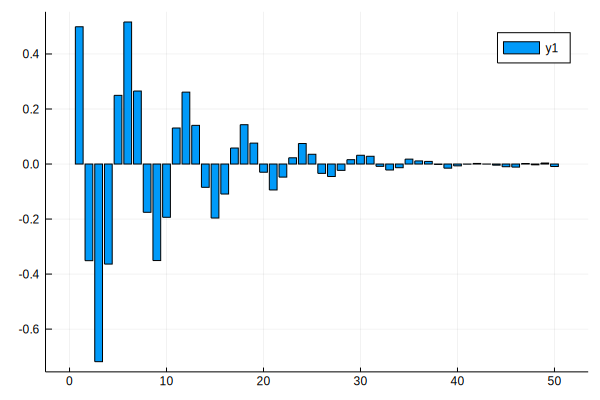

In [34]:
plot([autocorrelation((i),ar_q(0, 0, 1, [0.9,-0.8], 100000)) for i in 1:50],st=:bar)